In [1]:
import tweepy as tw
import numpy as np
import streamlit as st
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [2]:
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
st.title('Live Twitter Sentiment Analysis with Tweepy and VADER')
st.markdown('Coba kuy')

2022-01-05 17:56:59.695 
  command:

    streamlit run C:\Users\HIDEtoRICK\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [19]:
st.title('Live Twitter Sentiment Analysis x Transformers')
query = "no way home"
hasilSearch = api.search_tweets(q=query, count = 20, tweet_mode="extended", lang='en')

In [20]:
datat = [[tweet.user.screen_name, tweet.created_at, ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.full_text).split())] for tweet in hasilSearch]
#datat

In [21]:
tweet_text = pd.DataFrame(data=datat, 
                    columns=['user', "tanggal", "isi"])
tweet_text

,user,tanggal,isi
0,jallynwalrath,2022-01-05 10:58:05+00:00,RT We went from fighting about whether tobey a...
1,Karma4Magats,2022-01-05 10:58:00+00:00,RT No it s the way society isolates and ignore...
2,Dismayed12,2022-01-05 10:57:44+00:00,RT new national cabinet decision to no longer ...
3,NikCarlson16,2022-01-05 10:57:33+00:00,RT Yoooo This concept art for a Symbiote Spide...
4,miczapp,2022-01-05 10:57:25+00:00,god that s so awful because so many people are...
5,danhill0905,2022-01-05 10:57:25+00:00,RT THIS IS NOT OFFICIAL NO WAY HOME CONCEPT Bu...
6,Harry_W25,2022-01-05 10:57:20+00:00,RT BREAKING Spider Man No Way Home down to 4 2
7,Funyarinpa999,2022-01-05 10:57:19+00:00,The pity was 49 and Jean finally came home bee...
8,its_mashkid_,2022-01-05 10:57:17+00:00,RT mashkid I sure ain t coming home after a lo...
9,meimasy,2022-01-05 10:57:16+00:00,RT No Way Home really brought out a new genera...


In [8]:
df = tweet_text

In [9]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['isi']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.331,0.669,0.00,-0.8126
1,0.265,0.735,0.00,-0.7351
2,0.000,1.000,0.00,0.0000
3,0.062,0.818,0.12,0.3828
4,0.000,1.000,0.00,0.0000


The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).

The more Compound score closer to +1, the higher the positivity of the text.

In [10]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,user,tanggal,isi,neg,neu,pos,compound
0,Wally_Wests,2022-01-05 10:56:49+00:00,you fuckers leaked no way home and you cant pr...,0.331,0.669,0.0,-0.8126
1,risyazco04,2022-01-05 10:56:45+00:00,RT We went from fighting about whether tobey a...,0.265,0.735,0.0,-0.7351
2,ComicsinMotionP,2022-01-05 10:56:30+00:00,RT New Podcast It s our first pod of 2022 We r...,0.000,1.000,0.0,0.0000


In [11]:

# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

2022-01-05 17:57:00.806 NumExpr defaulting to 8 threads.


,user,tanggal,isi,neg,neu,pos,compound,Sentiment
0,Wally_Wests,2022-01-05 10:56:49+00:00,you fuckers leaked no way home and you cant pr...,0.331,0.669,0.00,-0.8126,Negative
1,risyazco04,2022-01-05 10:56:45+00:00,RT We went from fighting about whether tobey a...,0.265,0.735,0.00,-0.7351,Negative
2,ComicsinMotionP,2022-01-05 10:56:30+00:00,RT New Podcast It s our first pod of 2022 We r...,0.000,1.000,0.00,0.0000,Positive
3,SpiderMan3news,2022-01-05 10:56:29+00:00,THIS IS NOT OFFICIAL NO WAY HOME CONCEPT But i...,0.062,0.818,0.12,0.3828,Positive
4,qedx_,2022-01-05 10:56:19+00:00,RT Malaysian law does not recognise refugees w...,0.000,1.000,0.00,0.0000,Positive


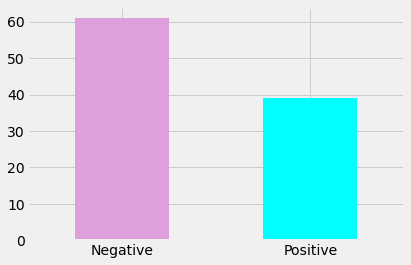

In [12]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

In [13]:
pos = df_c.loc[df_c['Sentiment'] == 'Positive']
pos

,user,tanggal,isi,neg,neu,pos,compound,Sentiment
2,ComicsinMotionP,2022-01-05 10:56:30+00:00,RT New Podcast It s our first pod of 2022 We r...,0.000,1.000,0.000,0.0000,Positive
3,SpiderMan3news,2022-01-05 10:56:29+00:00,THIS IS NOT OFFICIAL NO WAY HOME CONCEPT But i...,0.062,0.818,0.120,0.3828,Positive
4,qedx_,2022-01-05 10:56:19+00:00,RT Malaysian law does not recognise refugees w...,0.000,1.000,0.000,0.0000,Positive
8,bleucalla,2022-01-05 10:56:03+00:00,RT Direct Non official art from SpiderManNoWay...,0.000,1.000,0.000,0.0000,Positive
12,jmfarrow,2022-01-05 10:55:40+00:00,RT We ve come to the point that the only remai...,0.083,0.737,0.179,0.4588,Positive
13,szeasonalnft,2022-01-05 10:55:36+00:00,RT Spider Man No Way Home x Invisible Friends ...,0.068,0.745,0.186,0.5859,Positive
16,fixyourheartsor,2022-01-05 10:55:03+00:00,FOR YOUR CONSIDERATION SPIDER MAN NO WAY HOME ...,0.068,0.816,0.115,0.4588,Positive
17,Triscui92561373,2022-01-05 10:55:02+00:00,RT Tom Holland says he wouldn t change a singl...,0.000,1.000,0.000,0.0000,Positive
20,1d_babygirlss,2022-01-05 10:54:24+00:00,RT Andrew Garfield really came to peace with S...,0.071,0.674,0.255,0.7755,Positive
24,_thesuperMarion,2022-01-05 10:53:23+00:00,Hello anyone wanted to buy Spiderman No Way Ho...,0.096,0.739,0.165,0.1531,Positive


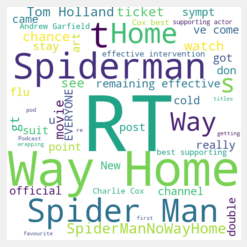

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud2 = WordCloud(max_words=50, background_color="white", width = 500, height = 500).generate(' '.join(pos['isi']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("pos.png")

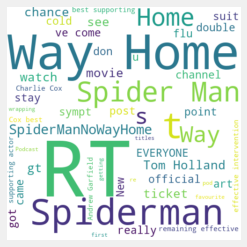

In [15]:
neg = df_c.loc[df_c['Sentiment'] == 'Negative']
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud2 = WordCloud(max_words=50, background_color="white", width = 500, height = 500).generate(' '.join(pos['isi']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("neg.png")